https://www.kaggle.com/c/titanic
https://www.kaggle.com/alexisbcook/titanic-tutorial   
https://app.dataquest.io/m/289/introduction-to-numpy/7/selecting-columns-and-custom-slicing-ndarrays
https://neurohive.io/ru/osnovy-data-science/razbor-resheniya-zadachi-titanik-na-kaggle-dlya-nachinajushhih/
https://habr.com/ru/post/274171/
https://habr.com/ru/post/202090/
https://habr.com/ru/post/470535/ 

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot,show,hist
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist
#%config InlineBackend.figure_format = 'svg' для большей четкости графиков
matplotlib.style.use('ggplot')
%matplotlib inline


os.chdir(r'C:\Users\Mr Alex\Documents\GitHub\Kaggle\Titanic')
trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')

#Сливаем открытые фреймы в один
td = pd.concat([trd, tsd], ignore_index=True, sort = False)

In [ ]:
td.head(3)

In [7]:
important = ['Survived', 'Sex', 'Age', 'Fare']

In [ ]:
td.info()

In [ ]:
td.shape

In [ ]:
td.dtypes

In [ ]:
#Статистика по колонкам с объектами
td.describe(include=['O'])
#Выбираем только те колонки, которые нам интересны
df.select_dtypes(include=[‘float64’, ‘int64’])

In [ ]:
#Статистика по всем
td.describe(include="all")

In [ ]:
#Только по цифровым колонкам ищем нужное нам значение
td.mean(numeric_only = True)

In [ ]:
#Тепловая карта пропущенных значений
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [16]:
#Преобразуем колонку с объектами в числовую
level_map = {"male": 1, "female": 0}
td['Sex'] = td['Sex'].map(level_map)

#Преобразуем Dtype колонки в bool
td['Survived'] = td['Survived'].astype('bool')

In [ ]:
#Статистика по родственникам на борту
td[['Parch', 'SibSp']].value_counts()

In [ ]:
#Оцениваем возраст
td["Age"].unique()
td["Age"].mean()
td_age = td['Age'].value_counts()
age_24_30 = td_age.loc[[24.00, 30.00]]
td.loc[:10, ["Age", "Sex"]]

In [ ]:
#Зависимая и независимые переменные. Сортировка выживших по полу и возрасту. 
td[["Survived", "Age", "Sex"]].value_counts().loc[1]

In [ ]:
#Зависимая и независимые переменные. Средняя доля выживших и среднее по возрасту и цене билета
td[["Survived", "Age", "Fare"]].mean(axis=0)

In [4]:
#Получение сокращенного фрейма по конкретным критериям
td[td["Sex"].isin([True])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",True,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",True,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",True,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
#Сортировка
td.sort_values('Age', ascending=False).head()

In [ ]:
#Агрегирование. Подсчет количества записей
td.groupby('Fare').count()

In [ ]:
#Рисуем гистограмму
td['Age'].hist(bins=40)

In [3]:
#новые категории тарифов в новый столбец Fare_Category.
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

In [ ]:
td.groupby('Survived')['Age'].plot.hist(density=True)
plt.legend()

In [ ]:
for column in ['Survived', 'Pclass', 'Sex']:
    print(td[column].value_counts(normalize=True))

In [ ]:
# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

In [ ]:
# Строим картинку
td['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

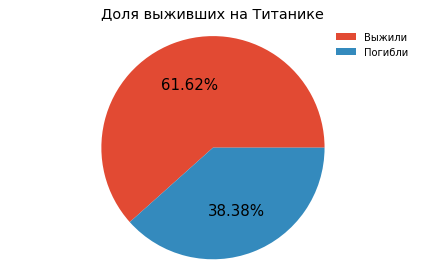

In [12]:
#Доля выживших на Титанике
fig, ax = plt.subplots(1)
td['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

Text(0.5, 1.0, 'Распределение возраста')

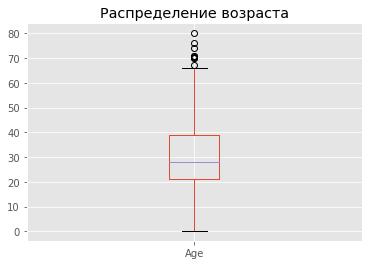

In [13]:
td['Age'].plot(kind='box')
plt.title(u'Распределение возраста')

Text(0.5, 0.98, '')

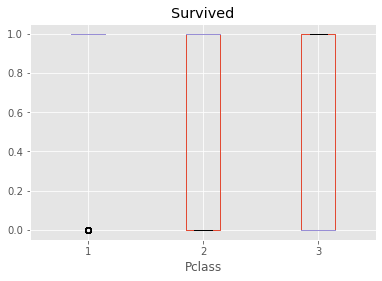

In [21]:
ax = td.boxplot(column='Survived', by='Pclass')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')

In [ ]:
#иерархический кластерный анализ
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
td_new = td[important]
td_new.head()

,Survived,Sex,Age,Fare
0,0.0,True,22.0,7.2500
1,1.0,False,38.0,71.2833
2,1.0,False,26.0,7.9250
3,1.0,False,35.0,53.1000
4,0.0,True,35.0,8.0500
